In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\abhis\Downloads\archive (19)\cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [3]:
#Q1. A) and Q1. B)
pd.DataFrame(100*(df.isnull().sum()/df.shape[0])).T

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.0,0.0,0.0,25.358852,0.0,0.0,25.358852,25.358852,25.358852,0.0,0.0,32.057416,0.0,25.837321,25.358852,25.358852,32.535885,2.631579,0.478469,1.435407


<AxesSubplot:>

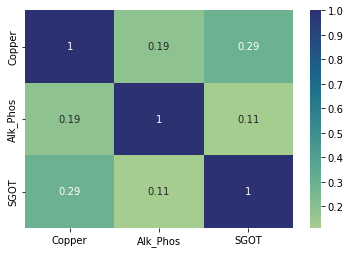

In [4]:
#Q1. C)
sns.heatmap(df[['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Copper', 'Alk_Phos','SGOT']].corr(), annot = True, cmap = 'crest')

In [5]:
# Q2 A) how does platelets count vary with age in males and females? show relaltionship using a visualizations 

In [6]:
df['Age_y'] = df['Age']/365

In [48]:
df['age_bin']=pd.cut(df['Age_y'], bins = np.arange(20,90,10))

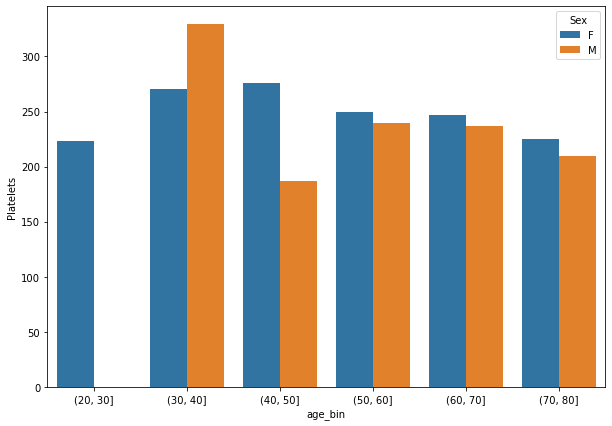

In [85]:
temp = df.groupby(['age_bin','Sex'], as_index = False)['Platelets'].mean()
plt.figure(figsize = (10,7))
sns.barplot(x = temp['age_bin'], y = temp['Platelets'], hue = temp['Sex']);

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


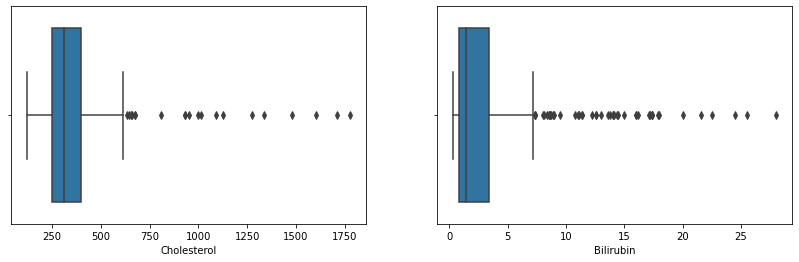

In [114]:
#Q.2 B)
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
print(sns.boxplot(x = df['Cholesterol'], data = df))
plt.subplot(1,2,2)
print(sns.boxplot(x = df['Bilirubin'], data = df))
plt.show();

In [74]:
lc = df['Cholesterol'].quantile(0.25) - 1.5*(df['Cholesterol'].quantile(0.75)-df['Cholesterol'].quantile(0.25))
uc = df['Cholesterol'].quantile(0.75) + 1.5*(df['Cholesterol'].quantile(0.75)-df['Cholesterol'].quantile(0.25))
c = df['Cholesterol']
c = np.where(c>uc, uc, np.where(c<lc, lc, c))
df['cholesterol_modified'] = pd.DataFrame(c)

In [75]:
lb = df['Bilirubin'].quantile(0.25) - 1.5*(df['Bilirubin'].quantile(0.75)-df['Bilirubin'].quantile(0.25))
ub = df['Bilirubin'].quantile(0.75) + 1.5*(df['Bilirubin'].quantile(0.75)-df['Bilirubin'].quantile(0.25))
f = df['Bilirubin']
f = np.where(f>ub, ub, np.where(f<lb, lb, f))
df['bilirubin_modified'] = pd.DataFrame(f)

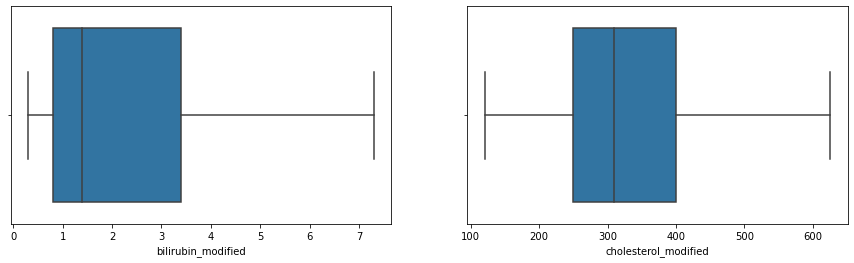

In [80]:
# after handling outliers
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['bilirubin_modified'], data  = df)
plt.subplot(1,2,2) 
sns.boxplot(df['cholesterol_modified'], data  = df)
plt.show();

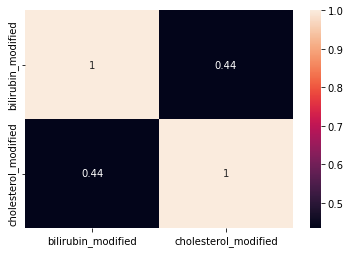

In [84]:
# Q2. C)
sns.heatmap(df[['bilirubin_modified', 'cholesterol_modified']].corr(), annot = True);

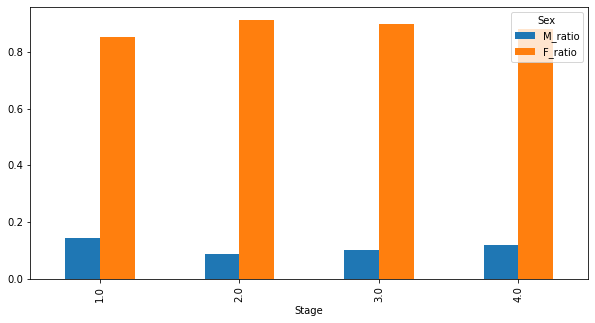

In [111]:
'''Q3. A) How does the ratio of males to females changes as we go down the severity stage of cirrhosis from 1 to 4?
comment for pattern. '''

table = pd.pivot_table(df, index  = 'Stage', columns = 'Sex', aggfunc = 'size', fill_value = 0)
table['M_ratio'] =  table['M']/table.sum(axis = 1)
table['F_ratio'] =  table['F']/table.sum(axis = 1)
table[['M_ratio','F_ratio']].plot(kind = 'bar',figsize  = (10,5));

<AxesSubplot:xlabel='Stage', ylabel='Tryglicerides'>

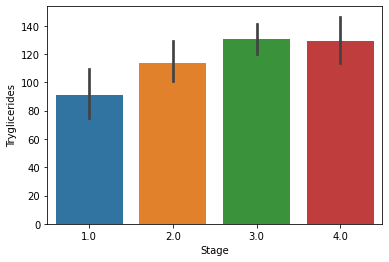

In [172]:
# Q3. B) Does the presence of triglycerides increase the stage severity of cirrhosis? Run a statistical test to prove the same.

sns.barplot(y = 'Tryglicerides', x = 'Stage', data = df)

In [130]:
df['Age']= (df['Age'].values/365).round()

In [132]:
df.drop(['Age_y', 'Cholesterol', 'Bilirubin', 'ID'], axis =1)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,age_bin,cholesterol_modified,bilirubin_modified,Stage
0,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,"(50, 60]",261.0,7.3,4.0
1,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,"(50, 60]",302.0,1.1,3.0
2,1012,D,D-penicillamine,70.0,M,N,N,N,S,3.48,210.0,516.0,96.10,55.0,151.0,12.0,"(70, 80]",176.0,1.4,4.0
3,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,"(50, 60]",244.0,1.8,4.0
4,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.53,143.0,671.0,113.15,72.0,136.0,10.9,"(30, 40]",279.0,3.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,NaN,67.0,F,NaN,NaN,NaN,N,2.96,NaN,NaN,NaN,NaN,174.0,10.9,"(60, 70]",NaN,1.2,3.0
414,1103,C,NaN,39.0,F,NaN,NaN,NaN,N,3.83,NaN,NaN,NaN,NaN,180.0,11.2,"(30, 40]",NaN,0.9,4.0
415,1055,C,NaN,57.0,F,NaN,NaN,NaN,N,3.42,NaN,NaN,NaN,NaN,143.0,9.9,"(50, 60]",NaN,1.6,3.0
416,691,C,NaN,58.0,F,NaN,NaN,NaN,N,3.75,NaN,NaN,NaN,NaN,269.0,10.4,"(50, 60]",NaN,0.8,3.0


In [137]:
df['Status'].replace({'D': 0, 'C': 1, 'CL':2}, inplace = True)

In [143]:
df.drop('Status',axis = 1, inplace = True)
df

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Age_y,age_bin,cholesterol_modified,bilirubin_modified,Stage,status
0,1,400,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,...,137.95,172.0,190.0,12.2,58.805479,"(50, 60]",261.0,7.3,4.0,0
1,2,4500,D-penicillamine,56.0,F,N,Y,Y,N,1.1,...,113.52,88.0,221.0,10.6,56.484932,"(50, 60]",302.0,1.1,3.0,1
2,3,1012,D-penicillamine,70.0,M,N,N,N,S,1.4,...,96.10,55.0,151.0,12.0,70.120548,"(70, 80]",176.0,1.4,4.0,0
3,4,1925,D-penicillamine,55.0,F,N,Y,Y,S,1.8,...,60.63,92.0,183.0,10.3,54.778082,"(50, 60]",244.0,1.8,4.0,0
4,5,1504,Placebo,38.0,F,N,Y,Y,N,3.4,...,113.15,72.0,136.0,10.9,38.131507,"(30, 40]",279.0,3.4,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,NaN,67.0,F,NaN,NaN,NaN,N,1.2,...,NaN,NaN,174.0,10.9,67.046575,"(60, 70]",NaN,1.2,3.0,0
414,415,1103,NaN,39.0,F,NaN,NaN,NaN,N,0.9,...,NaN,NaN,180.0,11.2,39.027397,"(30, 40]",NaN,0.9,4.0,1
415,416,1055,NaN,57.0,F,NaN,NaN,NaN,N,1.6,...,NaN,NaN,143.0,9.9,57.038356,"(50, 60]",NaN,1.6,3.0,1
416,417,691,NaN,58.0,F,NaN,NaN,NaN,N,0.8,...,NaN,NaN,269.0,10.4,58.041096,"(50, 60]",NaN,0.8,3.0,1


In [134]:
X = df.iloc[:,1:-1]

In [144]:
X

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,cholesterol_modified,bilirubin_modified,Stage
0,400,D-penicillamine,59.0,F,Y,Y,Y,Y,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,261.0,7.3,4.0
1,4500,D-penicillamine,56.0,F,N,Y,Y,N,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,302.0,1.1,3.0
2,1012,D-penicillamine,70.0,M,N,N,N,S,3.48,210.0,516.0,96.10,55.0,151.0,12.0,176.0,1.4,4.0
3,1925,D-penicillamine,55.0,F,N,Y,Y,S,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,244.0,1.8,4.0
4,1504,Placebo,38.0,F,N,Y,Y,N,3.53,143.0,671.0,113.15,72.0,136.0,10.9,279.0,3.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,NaN,67.0,F,NaN,NaN,NaN,N,2.96,NaN,NaN,NaN,NaN,174.0,10.9,NaN,1.2,3.0
414,1103,NaN,39.0,F,NaN,NaN,NaN,N,3.83,NaN,NaN,NaN,NaN,180.0,11.2,NaN,0.9,4.0
415,1055,NaN,57.0,F,NaN,NaN,NaN,N,3.42,NaN,NaN,NaN,NaN,143.0,9.9,NaN,1.6,3.0
416,691,NaN,58.0,F,NaN,NaN,NaN,N,3.75,NaN,NaN,NaN,NaN,269.0,10.4,NaN,0.8,3.0


In [146]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(X.iloc[:,8:-1])
X.iloc[:,8:-1] = si.transform(X.iloc[:,8:-1])

In [147]:
X

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,cholesterol_modified,bilirubin_modified,Stage
0,400,D-penicillamine,59.0,F,Y,Y,Y,Y,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,261.000000,7.3,4.0
1,4500,D-penicillamine,56.0,F,N,Y,Y,N,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,302.000000,1.1,3.0
2,1012,D-penicillamine,70.0,M,N,N,N,S,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,176.000000,1.4,4.0
3,1925,D-penicillamine,55.0,F,N,Y,Y,S,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,244.000000,1.8,4.0
4,1504,Placebo,38.0,F,N,Y,Y,N,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,279.000000,3.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,NaN,67.0,F,NaN,NaN,NaN,N,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,339.711268,1.2,3.0
414,1103,NaN,39.0,F,NaN,NaN,NaN,N,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,339.711268,0.9,4.0
415,1055,NaN,57.0,F,NaN,NaN,NaN,N,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,339.711268,1.6,3.0
416,691,NaN,58.0,F,NaN,NaN,NaN,N,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,339.711268,0.8,3.0


In [149]:
y = df['status']

In [150]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 3, 4, 5, 6, 7])], remainder="passthrough" )
X = np.array(ct.fit_transform(X))

In [169]:
X

array([[  1.        ,   0.        ,   0.        , ..., 261.        ,
          7.3       ,   4.        ],
       [  1.        ,   0.        ,   0.        , ..., 302.        ,
          1.1       ,   3.        ],
       [  1.        ,   0.        ,   0.        , ..., 176.        ,
          1.4       ,   4.        ],
       ...,
       [  0.        ,   0.        ,   1.        , ..., 339.71126761,
          1.6       ,   3.        ],
       [  0.        ,   0.        ,   1.        , ..., 339.71126761,
          0.8       ,   3.        ],
       [  0.        ,   0.        ,   1.        , ..., 339.71126761,
          0.7       ,   4.        ]])

In [163]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [164]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric='mlogloss')
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)

<AxesSubplot:xlabel='status', ylabel='Density'>

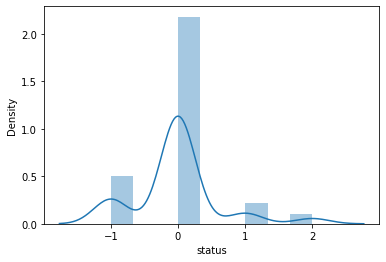

In [165]:
sns.distplot(y_test-y_predxg)

In [166]:
from sklearn.metrics import mean_absolute_error
a = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =10)


In [167]:
print(f"XGBoost Mean Score : {mean_absolute_error(y_test, y_predxg)}")
print(f"XGBoost Accuracy : {a.mean()*100} %\n")

XGBoost Mean Score : 0.30952380952380953
XGBoost Accuracy : 73.36007130124777 %



In [170]:
y_predxg

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)